 # Employee Attrition
 The aim of this study is to provide companies with information on why employees leave. This may happen for several reasons:
 - Low income
 - Working environment
 - Low level of satisfaction
 - Retirement
 - Health issues

In [1]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import make_scorer
from sklearn.model_selection import cross_val_score
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from matplotlib.gridspec import GridSpec
from time import time
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_validate
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, recall_score, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
import itertools
import os

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import importlib.util

curr_dir = os.getcwd()

try:

    from utility_functions.plot_roc import plot_roc_and_conf_matrix, plot_roc

except:

    os.chdir('../')

    from utility_functions.plot_roc import plot_roc_and_conf_matrix, plot_roc

plt.style.use(['ggplot', 'seaborn'])


In [2]:
os.chdir(curr_dir)

in_dir = 'data'

in_data = os.path.join(in_dir, 'employee-attrition.csv')

df = pd.read_csv(in_data)


 # Exploratory Data Analysis (EDA)

In [3]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
Age                         1470 non-null int64
Attrition                   1470 non-null object
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

 - There aren't any missing values
 - The target variable appears to be categorical.
 - There are two datatypes: int and objects

In [4]:
df.describe().T


,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [5]:
df.sample(10)


,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1034,45,No,Travel_Rarely,1038,Research & Development,20,3,Medical,1,1460,...,2,80,1,24,2,3,7,7,0,7
759,45,No,Travel_Rarely,788,Human Resources,24,4,Medical,1,1049,...,1,80,0,6,3,3,6,3,0,4
115,37,No,Travel_Rarely,1189,Sales,3,3,Life Sciences,1,152,...,1,80,0,12,3,3,5,3,1,3
1337,28,No,Travel_Rarely,1172,Sales,3,3,Medical,1,1875,...,4,80,1,1,3,3,1,0,0,0
1075,32,No,Travel_Rarely,495,Research & Development,10,3,Medical,1,1516,...,2,80,0,10,5,4,5,2,0,0
1231,46,No,Travel_Rarely,717,Research & Development,13,4,Life Sciences,1,1727,...,4,80,0,19,3,3,10,7,0,9
877,46,No,Travel_Rarely,150,Research & Development,2,4,Technical Degree,1,1228,...,3,80,1,12,3,2,6,3,1,4
575,54,No,Travel_Rarely,376,Research & Development,19,4,Medical,1,799,...,2,80,2,9,4,3,5,3,1,4
1325,42,No,Travel_Rarely,1142,Research & Development,8,3,Life Sciences,1,1860,...,4,80,0,8,3,3,0,0,0,0
792,33,Yes,Travel_Frequently,827,Research & Development,29,4,Medical,1,1101,...,2,80,0,14,4,3,13,7,3,8


 - Quite a few features appear to be ordinal variables (Education, EnvironmentSatisfaction, JobInvolvment, ...)
 - There are only two possible values for the target variable and it is highly imbalanced, will need to balance it before training the model.
 Let us transform Attrition into numeric.

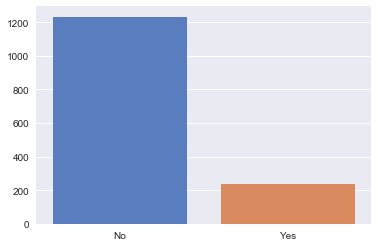

In [6]:
data = df['Attrition'].value_counts()

_ = sns.barplot(data.index, data.values, palette='muted')


In [7]:
df.loc[df['Attrition'] == 'Yes', 'Attrition'] = 1
df.loc[df['Attrition'] == 'No', 'Attrition'] = 0


 #### General Considerations

In [8]:


def PlotDists(feature, position):
    '''
    '''
    g = sns.factorplot(x=feature, y='Attrition',
                       data=df, palette='muted', kind='bar', size=6, ax=position)

    g.despine(left=True)

    g = g.set_ylabels('Attrition probability')

    # This is needed, see: https://stackoverflow.com/questions/33925494/seaborn-produces-separate-figures-in-subplots
    plt.close(g.fig)



c:\users\bertoli.euris\.virtualenvs\waterleaks\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
c:\users\bertoli.euris\.virtualenvs\waterleaks\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


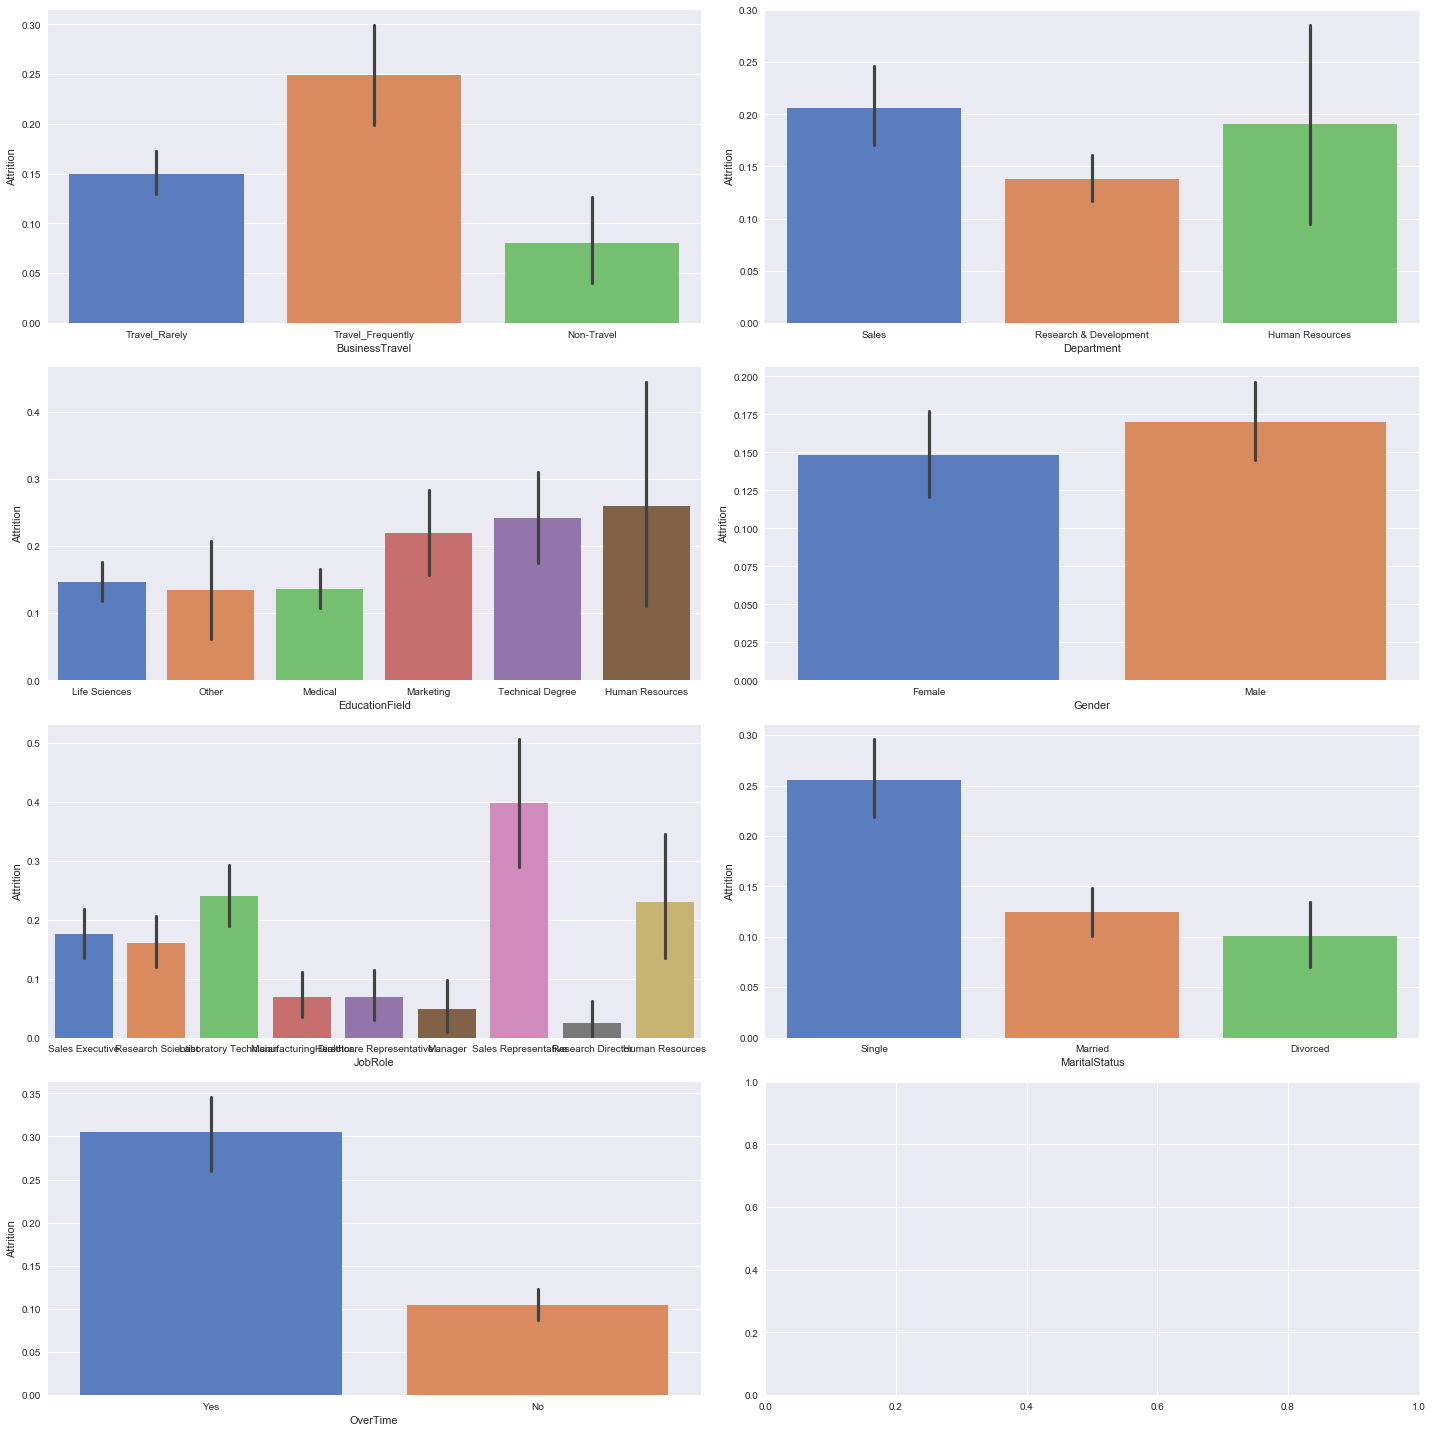

In [9]:
to_plot = ['BusinessTravel', 'Department', 'EducationField', 'Gender',
           'JobRole', 'MaritalStatus', 'OverTime']

fig, ax = plt.subplots(4, 2, figsize=(20, 20), sharex=False, sharey=False)

# Flatten out the axis object
ax = ax.ravel()

for i in range(7):

    PlotDists(to_plot[i], ax[i])

plt.tight_layout()
plt.show()


 - Looks like that people who travel more frequently are more likely to quit compared to those who don't travel or travel rarely.
 - People in the sales department are more likely to quit although HR has a high standard deviation.
 - Male quit more often than women.
 - Sales representatives have the highest probability to quit.
 - Singles are more likely to quit compared to married or divorced employees.
 - People doing overtime have a high probability to quit.

 Would be nice to study more the relationship between the features but for time constraints I will come back to it if I have some time left.

 #### Impact of Gender
 There are few factors that could impact attrition that are worth exploring:
 - Is there any differences between genders? Do male earn more than females? Are females more satisfied than males?

The average age for men is: 36.6530612244898
The average age for women is: 37.32993197278912


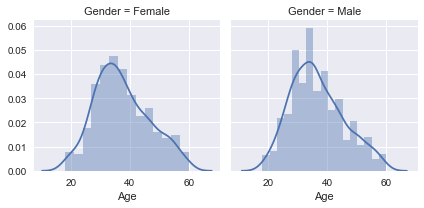

In [10]:
# How old are the employeed by gender?
print('The average age for men is:',
      df.loc[df['Gender'] == 'Male', 'Age'].mean())

print('The average age for women is:',
      df.loc[df['Gender'] == 'Female', 'Age'].mean())

g = sns.FacetGrid(df, col='Gender')
g = g.map(sns.distplot, 'Age')


 The average age for men is 36.65 years while for women is 37.33. Both distributions appear to be quite similar.

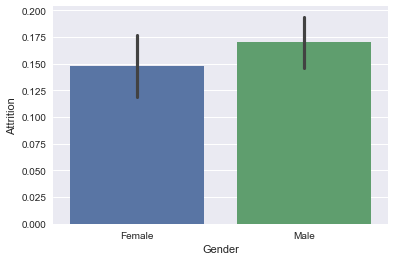

In [11]:
# Let us explore the likelihood of quitting by gender.
g = sns.barplot(x='Gender', y='Attrition', data=df)


 It appears that male employee are more likely to leave than females.

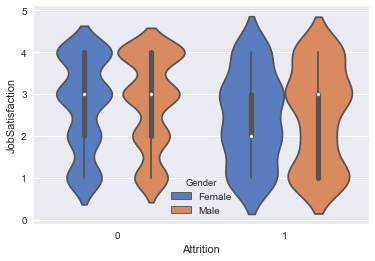

In [12]:
# I want to explore the probability of leaving based on job satisfaction by gender.
_ = sns.violinplot(x='Attrition', y='JobSatisfaction',
                   data=df, hue='Gender', palette='muted')


 It appears that for those who didn't leave the job satisfaction level is the same across genders. On the other hand females who left were more dissatisfied compared to males.

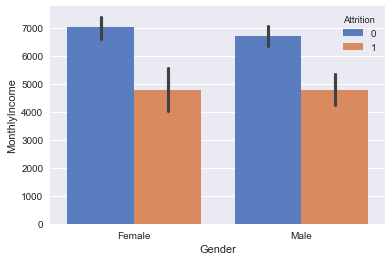

In [13]:
# How about salary? Is there any disparity between sexes?
g = sns.barplot(x='Gender', y='MonthlyIncome', data=df,
                hue='Attrition', palette='muted')


 It appears that women earn slightly more than men. Those who left the company earn the same amount across genders and significantly lower than those who stayed, this would make me think that income is an important factor in the decision process and thus worth investigating more.

 #### Impact of Income
 - Is income more important than job satisfaction?
 - Is there a huge difference in income between different roles in the company? How does this affect Attrition?
 - Is payrise a factor to consider in Attrition?

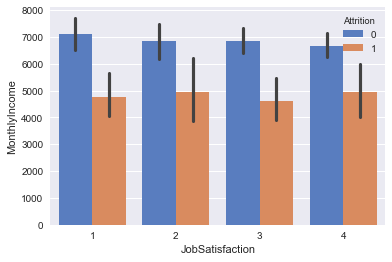

In [14]:
_ = sns.barplot(x='JobSatisfaction', y='MonthlyIncome',
                data=df, hue='Attrition', palette='muted')


 Looks like that independently from job satisfaction people who left the company earned significantly less than those who stayed.

 Let us check correlation between variables.

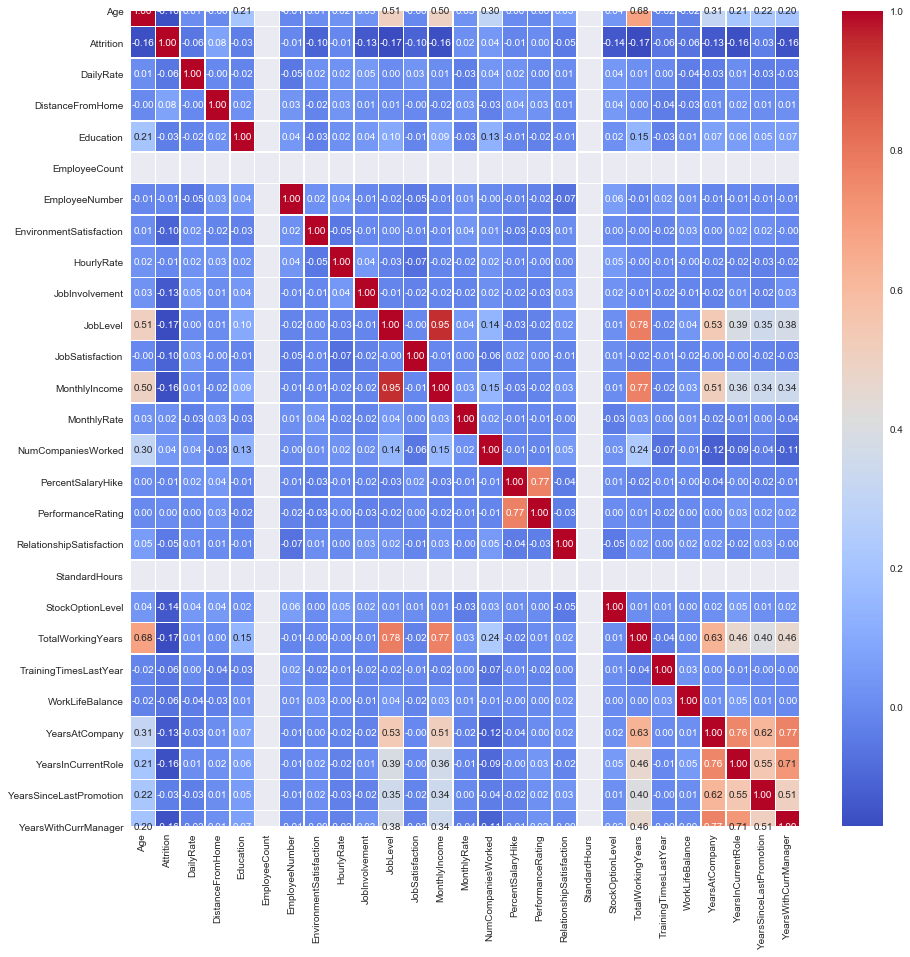

In [15]:
corr = df.corr()

fig, ax = plt.subplots(figsize=(15, 15))

sns.heatmap(corr, cmap='coolwarm', annot=True, fmt='.2f', linewidths=.5, ax=ax)


In [16]:
abs(corr['Attrition']) > 0.5


Age                         False
Attrition                    True
DailyRate                   False
DistanceFromHome            False
Education                   False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobSatisfaction             False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesLastYear       False
WorkLifeBalance             False
YearsAtCompany              False
YearsInCurrentRole          False
YearsSinceLastPromotion     False
YearsWithCurrManager        False
Name: Attrition, dtype: bool

 There don't seem to be high correlation between any of the variables and the target one but some features are highly correlated with each other and worth investigating more to see if they can be dropped. In particular:
 - JobLevel almost has perfect correlation with MonthlyIncome
 - EmployeeCount and StandardHours have the same number in it and can probably be dropped from the dataset.
 - Age higly correlates with JobLevel, MonthlyIncome and TotalWorkingYears
 - JobLevel highly correlates with TotalWorkingYears and YearsAtCompany
 - MonthlyIncome highly correlates with TotalWorkingYears and YearsAtCompany
 - PercentSalaryHike highly correlates with PerformanceRating
 Let us check the categorical features

In [17]:
df.describe(include=['O'])


,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,Over18,OverTime
count,1470,1470,1470,1470,1470,1470,1470,1470
unique,3,3,6,2,9,3,1,2
top,Travel_Rarely,Research & Development,Life Sciences,Male,Sales Executive,Married,Y,No
freq,1043,961,606,882,326,673,1470,1054


 It appears that Over18 only have one value and can be dropped from the dataset.

In [18]:
to_drop = ['EmployeeCount', 'StandardHours', 'Over18', 'EmployeeNumber']

df.drop(columns=to_drop, inplace=True)


In [19]:
# Get numerical and categorical features
numerical = df.select_dtypes(exclude=['object'])
categorical = df.select_dtypes(['object'])


 Convert BusinessTravel into an ordinal categorical variable since there is intrinsic order between non, rarely and frequently.

In [20]:
# One hot encode the remaining variables.
travel_map = {'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2}

df['BusinessTravel'] = df['BusinessTravel'].map(travel_map)

# One hot encode categorical features
df = pd.get_dummies(df, drop_first=True)


 We saw that the Attrition class is imbalanced. As a consequence accuracy is not a good metric anymore and we should use other metrics when comparing models such as recall, f1-score or AUC. Moreover most algorithms will learn patterns that will be biased towards the majority class.
 We can deal with imbalanced classes by:
 - Assign a bigger penalty to wrong predictions from the minority class.
 - Upsampling the minority class or downsampling the majority one.
 - Simulate more data.
 A penalty for wrong predictios for the minority class can be assigned in some of the algorithms using the `class_weight` parameter.
 We need to split our dataset before oversampling because in this case, the same observation can be repeated in both the training and test sets causing the model to simply learn some specific datapoints and thus overfit.

In [21]:
# Split the dataset
X = df.drop('Attrition', axis=1)
y = df['Attrition']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=.2, random_state=42, stratify=y)


In [22]:
# Oversampling the minority class
X_train_up, y_train_up = resample(X_train[y_train == 1],
                                  y_train[y_train == 1],
                                  replace=True,
                                  n_samples=X_train[y_train == 0].shape[0],
                                  random_state=1)

X_train_up = pd.concat([X_train[y_train == 0], X_train_up])
y_train_up = pd.concat([y_train[y_train == 0], y_train_up])


In [23]:
# Downsample majority class
X_train_dw, y_train_dw = resample(X_train[y_train == 0],
                                  y_train[y_train == 0],
                                  replace=True,
                                  n_samples=X_train[y_train == 1].shape[0],
                                  random_state=1)

X_train_dw = pd.concat([X_train[y_train == 1], X_train_dw])
y_train_dw = pd.concat([y_train[y_train == 1], y_train_dw])


In [24]:
# Check the shapes of the classes
print("Original shape:", X_train.shape, y_train.shape)
print("Upsampled shape:", X_train_up.shape, y_train_up.shape)
print("Downsampled shape:", X_train_dw.shape, y_train_dw.shape)


Original shape: (1176, 43) (1176,)
Upsampled shape: (1972, 43) (1972,)
Downsampled shape: (380, 43) (380,)


Text(0.5, 1.0, 'PCA on training data')

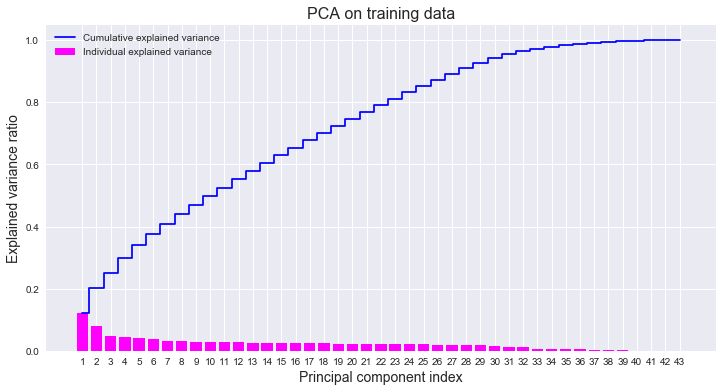

In [25]:
# Check the principal components

pca = PCA(n_components=None, svd_solver="full")

scaler = StandardScaler()
scaler = scaler.fit_transform(X_train)

pca.fit(scaler)

cum_var_exp = np.cumsum(pca.explained_variance_ratio_)

plt.figure(figsize=(12, 6))

n_features = len(cum_var_exp) + 1

plt.bar(range(1, n_features), pca.explained_variance_ratio_, align="center",
        color='magenta', label="Individual explained variance")

plt.step(range(1, n_features), cum_var_exp, where="mid",
         label="Cumulative explained variance", color='blue')

plt.xticks(range(1, n_features))
plt.legend(loc="best")

plt.xlabel("Principal component index", {"fontsize": 14})
plt.ylabel("Explained variance ratio", {"fontsize": 14})
plt.title("PCA on training data", {"fontsize": 16})


In [26]:
print('We need', np.where(cum_var_exp > 0.90)[
      0][0], 'features to explain 90% of the variation of the data.')
print('We need', np.where(cum_var_exp > 0.95)[
      0][0], 'features to explain 95% of the variation of the data.')
print('We need', np.where(cum_var_exp > 0.99)[
      0][0], 'features to explain 99% of the variation of the data.')


We need 27 features to explain 90% of the variation of the data.
We need 30 features to explain 95% of the variation of the data.
We need 36 features to explain 99% of the variation of the data.


 Since there are some redundant features we can use some algorithm to make a rank of the feature importance and decide which one we should remove.

In [27]:
# Utility function to report best scores


def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")



In [ ]:
# Preparing the parameters grid
# Number of trees in the random forest
n_estimators = [int(n) for n in np.linspace(200, 1000, 100)]

# Number of features to consider at each split
max_features = ['auto', 'sqrt', 'log2']

# Maximum number of levels in tree
max_depth = [int(n) for n in np.linspace(10, 100, 10)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of leaf required at each node
min_samples_leaf = [1, 2, 4]

# Method of selecting each samples for training each tree
bootstrap = [True, False]

# Construct the grid
param_grid = {
    'randomforestclassifier__n_estimators': n_estimators,
    'randomforestclassifier__max_features': max_features,
    'randomforestclassifier__max_depth': max_depth,
    'randomforestclassifier__min_samples_split': min_samples_split,
    'randomforestclassifier__min_samples_leaf': min_samples_leaf,
    'randomforestclassifier__bootstrap': bootstrap
}

datasets = {'imbalanced': (X_train, y_train),
            'up_sampled': (X_train_up, y_train_up),
            'dw_sampled': (X_train_dw, y_train_dw)}

for dataset in datasets:

    pipeline = make_pipeline(StandardScaler(),
                             RandomForestClassifier(n_estimators=200,
                                                    class_weight='balanced',
                                                    random_state=42))

    n_iter_search = 20

    gs_rf = RandomizedSearchCV(pipeline, param_distributions=param_grid,
                               scoring='f1', cv=10, n_jobs=-1, refit=True, iid=False, n_iter=n_iter_search)

    start = time()

    gs_rf.fit(datasets[dataset][0], datasets[dataset][1])

    print("RandomizedSearchCV took %.2f seconds for %d candidates"
          " parameter settings." % ((time() - start), n_iter_search))

    report(gs_rf.cv_results_)

    print("The best hyperparameters for {} data:".format(dataset))
    for hyperparam in gs_rf.best_params_.keys():
        print(hyperparam[hyperparam.find("__") + 2:],
              ": ", gs_rf.best_params_[hyperparam])

    print(
        "Best 10-folds CV f1-score: {:.2f}%.".format((gs_rf.best_score_) * 100))


 Since the upsampled dataset yelded the best results we will use it to train the other models.

In [ ]:
# Rename variables
X_train, y_train = X_train_up.copy(), y_train_up.copy()

# Free some memory
del X_train_dw, y_train_dw, X_train_up, y_train_up

# Refit the classifier with best parameters
pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier(n_estimators=765,
                                                min_samples_split=2,
                                                min_samples_leaf=1,
                                                max_features='log2',
                                                max_depth=30,
                                                bootstrap=False,
                                                class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=42))

rf = pipeline.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print('F1 score for the RandomForrest is', f1_score(y_test, rf_pred))


# Since the classes are balanced now, we can use the ROC curve to estimate the model skill. Otherwise we should have also plot a precision-recall curve.
plot_roc_and_conf_matrix(pipeline, X_test, y_test)


In [ ]:
# Plot feature importance according to the RandomForrest calssifier
# can also use: pipeline.named_steps['predictor'].feature_importances_
important_features = pd.Series(
    data=pipeline.steps[1][1].feature_importances_, index=X_train.columns)
important_features.sort_values(ascending=False, inplace=True)

_ = sns.barplot(x=important_features.values,
                y=important_features.index, orient='h')


In [ ]:
# Drop features that are highly correlated with each other but that are less important.
to_drop = ['JobLevel', 'TotalWorkingYears',
           'YearsAtCompany', 'PerformanceRating']

X_train_red = X_train.drop(columns=to_drop).copy()
X_test_red = X_test.drop(columns=to_drop).copy()

y_train_red = y_train.drop(columns=to_drop).copy()
y_test_red = y_test.drop(columns=to_drop).copy()


In [ ]:
# Let us train again our classifier and see the performance with the reduced dataset.
pipeline = make_pipeline(StandardScaler(),
                         RandomForestClassifier(n_estimators=765,
                                                min_samples_split=2,
                                                min_samples_leaf=1,
                                                max_features='log2',
                                                max_depth=30,
                                                bootstrap=False,
                                                class_weight='balanced',
                                                n_jobs=-1,
                                                random_state=42))

rf = pipeline.fit(X_train_red, y_train_red)


In [ ]:
rf_pred = rf.predict(X_test_red)


scorer = make_scorer(f1_score)

score = cross_val_score(pipeline, X_test_red, y_test_red, scoring=scorer, cv=5)

print(score.mean())

print('F1 score for the RandomForrest is', f1_score(y_test_red, rf_pred))

plot_roc_and_conf_matrix(pipeline, X_test_red, y_test_red)


In [ ]:
important_features = pd.Series(
    data=pipeline.steps[1][1].feature_importances_, index=X_train_red.columns)
important_features.sort_values(ascending=False, inplace=True)

_ = sns.barplot(x=important_features.values,
                y=important_features.index, orient='h')



In [ ]:
# Let us try different algorithms

clfs = []

clfs.append(LogisticRegression(random_state=42))
clfs.append(SVC(random_state=42))
clfs.append(DecisionTreeClassifier(random_state=42))
clfs.append(RandomForestClassifier(random_state=42))
clfs.append(KNeighborsClassifier())
clfs.append(LinearDiscriminantAnalysis())
clfs.append(ExtraTreesClassifier(random_state=42))

cv_results = []

for clf in clfs:

    result = cross_val_score(clf, X_train, y_train,
                             scoring='f1', cv=10, n_jobs=-1)

    cv_results.append(result)


In [ ]:
# Plot the CV results
cv_means = []
cv_stds = []

for result in cv_results:

    cv_means.append(result.mean())
    cv_stds.append(result.std())

algs = ['LogisticRegression', 'SVC', 'DecisionTree',
        'RandomForrest', 'KNN', 'LinearDiscriminant', 'ExtraTrees']

df_results = pd.DataFrame(
    {'cv_mean': cv_means, 'cv_std': cv_stds, 'algorithm': algs})

g = sns.barplot('cv_mean', 'algorithm', data=df_results,
                palette='muted', orient='h', xerr=cv_stds)

g.set_xlabel('F1 score')
g.set_title('CV Scores')


 Seems like SVC, DecisionTreeClassifier, RandomForrestClassifier and ExtraTreesClassifiers have the highest scores. Let us try to fine tune them.

 #### SVC

In [0]:
pip_svc = make_pipeline(StandardScaler(),
                        SVC(class_weight='balanced',
                            probability=True))

svc_params = {'svc__kernel': ['rbf', 'poly'],
              'svc__gamma': [0.001, 0.01, 0.1, 1],
              'svc__C': [1, 10, 50, 100, 200, 300, 1000]}

gs_svc = RandomizedSearchCV(pip_svc, param_distributions=svc_params,
                            scoring='f1', cv=10, n_jobs=-1, refit=True, iid=False, n_iter=n_iter_search)

gs_svc.fit(X_train, y_train)

print("The best hyperparameters:")
print("-" * 25)

for hyperparam in gs_svc.best_params_.keys():

    print(hyperparam[hyperparam.find("__") + 2:],
          ": ", gs_svc.best_params_[hyperparam])

# Print CV
print('The best 10-folds CV f1-score is: {:.2f}%'.format(
    np.mean(gs_svc.best_score_) * 100))


In [0]:
plot_roc_and_conf_matrix(gs_svc, X_test, y_test)


 #### DecisionTreeClassifier

In [0]:
dtc = DecisionTreeClassifier(class_weight='balanced')

pip_ada = make_pipeline(StandardScaler(),
                        AdaBoostClassifier(dtc, random_state=42))

ada_params = {"adaboostclassifier__base_estimator__criterion": ["gini", "entropy"],
              "adaboostclassifier__base_estimator__splitter":   ["best", "random"],
              "adaboostclassifier__algorithm": ["SAMME", "SAMME.R"],
              "adaboostclassifier__n_estimators": [1, 10, 50, 100],
              "adaboostclassifier__learning_rate":  [0.0001, 0.001, 0.01, 0.1, 0.2, 0.3, 1.5]
              }

gs_ada_dtc = RandomizedSearchCV(pip_ada, param_distributions=ada_params,
                                cv=10, scoring='f1', refit=True, iid=False, n_jobs=-1, verbose=1, n_iter=n_iter_search)

gs_ada_dtc.fit(X_train, y_train)

print("The best hyperparameters:")
print("-" * 25)

for hyperparam in gs_ada_dtc.best_params_.keys():

    print(hyperparam[hyperparam.find("__") + 2:],
          ": ", gs_ada_dtc.best_params_[hyperparam])

# Print CV
print('The 10-folds CV f1-score is: {:.2f}%'.format(
    np.mean(gs_ada_dtc.best_score_) * 100))


In [0]:
plot_roc_and_conf_matrix(gs_ada_dtc, X_test, y_test)


 #### RandomForrestClassifier

In [0]:
pip_rf = make_pipeline(StandardScaler(),
                       RandomForestClassifier(class_weight='balanced',
                                              random_state=42))

n_estimators = [int(n) for n in np.linspace(200, 1000, 100)]
max_features = ['auto', 'sqrt', 'log2']
max_depth = [int(n) for n in np.linspace(10, 100, 10)]
max_depth.append(None)
min_samples_split = [2, 5, 10]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]

rf_params = {'randomforestclassifier__n_estimators': n_estimators,
             'randomforestclassifier__max_features': max_features,
             'randomforestclassifier__max_depth': max_depth,
             'randomforestclassifier__min_samples_split': min_samples_split,
             'randomforestclassifier__min_samples_leaf': min_samples_leaf,
             'randomforestclassifier__bootstrap': bootstrap
             }

gs_rf = RandomizedSearchCV(pip_rf,
                           param_distributions=rf_params,
                           scoring='f1',
                           cv=10,
                           n_jobs=-1,
                           refit=True,
                           iid=False,
                           n_iter=n_iter_search)

gs_rf.fit(X_train, y_train)

print("The best hyperparameters:")
print("-" * 25)

for hyperparam in gs_rf.best_params_.keys():

    print(hyperparam[hyperparam.find("__") + 2:],
          ": ", gs_rf.best_params_[hyperparam])

# Print CV
print('The 10-folds CV f1-score is: {:.2f}%'.format(
    np.mean(gs_rf.best_score_) * 100))


In [0]:
plot_roc_and_conf_matrix(gs_rf, X_test, y_test)


 #### ExtraTreesClassifier

In [0]:
pip_et = make_pipeline(StandardScaler(),
                       ExtraTreesClassifier(class_weight='balanced',
                                            random_state=42))

et_params = {"extratreesclassifier__max_depth": [None],
             "extratreesclassifier__max_features": [1, 3, 10],
             "extratreesclassifier__min_samples_split": [2, 3, 10],
             "extratreesclassifier__min_samples_leaf": [1, 3, 10],
             "extratreesclassifier__bootstrap": [False],
             "extratreesclassifier__n_estimators": [100, 300],
             "extratreesclassifier__criterion": ["gini"]}

gs_et = RandomizedSearchCV(pip_et,
                           param_distributions=et_params,
                           scoring='f1',
                           cv=10,
                           n_jobs=-1,
                           refit=True,
                           iid=False,
                           n_iter=n_iter_search)

gs_et.fit(X_train, y_train)

print("The best hyperparameters:")
print("-" * 25)

for hyperparam in gs_et.best_params_.keys():

    print(hyperparam[hyperparam.find("__") + 2:],
          ": ", gs_et.best_params_[hyperparam])

# Print CV
print('The 10-folds CV f1-score is: {:.2f}%'.format(
    np.mean(gs_et.best_score_) * 100))


In [0]:
plot_roc_and_conf_matrix(gs_et, X_test, y_test)


 Let us now visualize the most important features for the best classifiers chosen.

In [0]:
# important_features = pd.Series(
#     data=pipeline.steps[1][1].feature_importances_, index=X_train_red.columns)
# important_features.sort_values(ascending=False, inplace=True)

# _ = sns.barplot(x=important_features.values,
#                 y=important_features.index, orient='h')

svc_best = gs_svc.best_estimator_
dtc_best = gs_ada_dtc.best_estimator_
rf_best = gs_rf.best_estimator_
et_best = gs_et.best_estimator_

clfs = [(dtc_best, 'BDT'), (rf_best, 'RandomForrest'), (et_best, 'ExtraTree')]

fig, ax = plt.subplots(2, 2, figsize=(15, 15), sharex=True)

ax = ax.ravel()

for i in range(len(clfs)):

    important_features = pd.Series(
        data=clfs[i][0].steps[1][1].feature_importances_, index=X_train.columns)

    important_features.sort_values(ascending=False, inplace=True)

    g = sns.barplot(x=important_features.values,
                    y=important_features.index, orient='h',
                    ax=ax[i])

    g.set_xlabel('Relative Importance')
    g.set_ylabel('Features')
    g.set_title(clfs[i][1])


In [0]:
# Plot ROC curves for all classifiers
estimators = {"RF": rf_best,
              "SVC": svc_best,
              "BDT": dtc_best,
              "ETC": et_best}

plot_roc(estimators, X_test, y_test, (12, 8))

# Print out accuracy score on test data
print("The accuracy rate and f1-score on test data are:")
for estimator in estimators.keys():
    print("{}: {:.2f}%, {:.2f}%.".format(estimator,
                                         accuracy_score(
                                             y_test, estimators[estimator].predict(X_test)) * 100,
                                         f1_score(y_test, estimators[estimator].predict(X_test)) * 100))


 Accuracy can be misleading when dealing with imbalanced classes, we can use instead:
 - Confusion Matrix: a table showing correct predictions and types of incorrect predictions.
 - Precision: the number of true positives divided by all positive predictions. It is a measure of a classifier's exactness. Low precision indicates a high number of false positives.
 - Recall or true positive rate: the number of true positives divided by the number of positive values in the test data. It is a measure of a classifier's completeness. Low recall indicates a high number of false negatives.
 - F1 Score: the weighted average of precision and recall.
 Since our main objective with the dataset is to prioritize accuraltely classifying fraud cases the recall score can be considered our main metric to use for evaluating outcomes.

 Next steps:
 - Implement RandomForrest
 - Use eithr random forrest of logistic regression to get a ranking of the variables and exclude redundant ones
 - Scale first just numeric and after numeric plus encoded variables to see performance
 Balance classes: oversampling, undersampling and penalyzing classes with `class_weight`
 PCA to see if we can reduce the dataset
 Train several models and evaluate the best performing ones.
 Use cross validation and GridSearchCV or RandomizedSearchCV.